# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

In [3]:
sensors = pd.read_csv("sensors.csv")
df = pd.DataFrame(data=sensors)
df

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00,2016-09-29 19:41:07.066+00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.793+00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.797+00,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.803+00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 20:13:52.811+00,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
...,...,...,...,...,...,...,...,...
56,e66851e0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 08:46:05+00,2016-09-29 20:13:52.902+00,35dcb3c1-8679-11e6-bda3-ef77801087ee,e662fab0-8679-11e6-a353-2f6c041e2491
57,d3d73500-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00,2016-10-05 12:42:18.933+00,35dcdad2-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491
58,d3d7d140-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00,2016-09-30 18:12:04.584+00,35dcdad1-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491
59,d3d3b291-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:31:29+00,2016-09-30 18:12:04.585+00,35dcdad0-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61 non-null     object
 1   description     61 non-null     object
 2   data_frequency  61 non-null     int64 
 3   status          61 non-null     object
 4   created_at      61 non-null     object
 5   updated_at      61 non-null     object
 6   data_type_id    61 non-null     object
 7   node_id         61 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.9+ KB


In [5]:
#Checking for any null values 
df.isnull().sum(axis=0)

id                0
description       0
data_frequency    0
status            0
created_at        0
updated_at        0
data_type_id      0
node_id           0
dtype: int64

In [6]:
datapoints = pd.read_csv("datapoints.csv")
df1 = pd.DataFrame(data=datapoints)
df1

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25+00,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25+00,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25+00,763ca6f0-8679-11e6-a353-2f6c041e2491
3,764dbdf1-8679-11e6-a353-2f6c041e2491,96893.110,2016-08-03 04:39:25+00,763d9150-8679-11e6-a353-2f6c041e2491
4,764dbdf2-8679-11e6-a353-2f6c041e2491,459.736,2016-08-03 04:39:25+00,763701a1-8679-11e6-a353-2f6c041e2491
...,...,...,...,...
176529,39e16940-e707-11e6-89c8-314aa4f67f8c,125.000,2016-08-31 19:00:01+00,1248ff60-e707-11e6-89c8-314aa4f67f8c
176530,39e82000-e707-11e6-89c8-314aa4f67f8c,143.000,2016-08-31 19:50:00+00,1248ff60-e707-11e6-89c8-314aa4f67f8c
176531,39f08470-e707-11e6-89c8-314aa4f67f8c,175.000,2016-08-31 21:00:02+00,1248ff60-e707-11e6-89c8-314aa4f67f8c
176532,39f84ca0-e707-11e6-89c8-314aa4f67f8c,164.000,2016-08-31 21:50:00+00,1248ff60-e707-11e6-89c8-314aa4f67f8c


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176534 entries, 0 to 176533
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         176534 non-null  object 
 1   value      63456 non-null   float64
 2   timestamp  176534 non-null  object 
 3   sensor_id  176534 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


In [8]:
df1.isnull().sum(axis=0)

id                0
value        113078
timestamp         0
sensor_id         0
dtype: int64

In [9]:
df1 = df1.dropna() #Dropping all the null values 
df1.isnull().sum(axis=0) #Checking if all the null values have been dropped 

id           0
value        0
timestamp    0
sensor_id    0
dtype: int64

In [10]:
datatypes = pd.read_csv("datatypes.csv")
df2 = pd.DataFrame(data=datatypes)
df2

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S
5,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
6,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       7 non-null      object
 1   type     7 non-null      object
 2   si_unit  7 non-null      object
 3   type_id  7 non-null      object
dtypes: object(4)
memory usage: 352.0+ bytes


In [12]:
df2.isnull().sum(axis=0)

id         0
type       0
si_unit    0
type_id    0
dtype: int64

In [13]:
nodes = pd.read_csv("nodes.csv")
df3 = pd.DataFrame(data=nodes)
df3

,id,name,description,location,status,created_at,updated_at,volcano_id
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,\N,\N,OFFLINE,2016-08-17 01:06:49+00,2016-09-29 19:28:05.932+00,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00,2016-09-29 19:41:07.065+00,35dc3e90-8679-11e6-bda3-ef77801087ee
2,76309900-8679-11e6-a353-2f6c041e2491,N8,\N,\N,OFFLINE,2016-08-03 22:09:40+00,2016-09-29 19:20:17.417+00,35dc3e90-8679-11e6-bda3-ef77801087ee
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00,2016-09-29 19:20:17.431+00,35dc3e90-8679-11e6-bda3-ef77801087ee
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2,\N,\N,OFFLINE,2016-08-10 04:20:22+00,2016-09-29 19:20:17.523+00,35dc3e90-8679-11e6-bda3-ef77801087ee
5,d3cbc350-8679-11e6-a353-2f6c041e2491,N3,\N,\N,OFFLINE,2016-08-15 06:10:39+00,2016-10-05 12:42:18.953+00,35dc3e90-8679-11e6-bda3-ef77801087ee
6,762c5340-8679-11e6-a353-2f6c041e2491,N7,\N,\N,OFFLINE,2016-08-03 21:50:32+00,2016-10-07 07:43:05.001+00,35dc3e90-8679-11e6-bda3-ef77801087ee
7,d3ca3cb0-8679-11e6-a353-2f6c041e2491,N4,\N,\N,OFFLINE,2016-08-15 05:22:31+00,2016-10-07 07:43:05.001+00,35dc3e90-8679-11e6-bda3-ef77801087ee
8,d3cb7530-8679-11e6-a353-2f6c041e2491,N5,\N,\N,OFFLINE,2016-08-15 05:31:29+00,2016-10-07 07:43:05.002+00,35dc3e90-8679-11e6-bda3-ef77801087ee
9,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231+00,2017-01-30 16:24:05.867+00,35dc3e90-8679-11e6-bda3-ef77801087ee


In [14]:
df3.dtypes

id             object
name           object
description    object
location       object
status         object
created_at     object
updated_at     object
volcano_id     object
dtype: object

In [15]:
df3.isnull().sum(axis=0)#summation of null values

id             0
name           0
description    0
location       0
status         0
created_at     0
updated_at     0
volcano_id     0
dtype: int64

In [16]:
volcanos = pd.read_csv("volcanos.csv")
df4 = pd.DataFrame(data=volcanos)
df4.head()

,id,name,description,location,status,created_at,updated_at
0,35dc3e90-8679-11e6-bda3-ef77801087ee,Masaya,"This is the world's biggest, baddest, most evi...","{11.985318299999999,-86.178342900000004}",OFFLINE,2016-09-29 19:16:23.419+00,2016-10-07 07:43:05.015+00


In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1 non-null      object
 1   name         1 non-null      object
 2   description  1 non-null      object
 3   location     1 non-null      object
 4   status       1 non-null      object
 5   created_at   1 non-null      object
 6   updated_at   1 non-null      object
dtypes: object(7)
memory usage: 184.0+ bytes


In [18]:
df4.isnull().sum(axis=0)#summation of null values

id             0
name           0
description    0
location       0
status         0
created_at     0
updated_at     0
dtype: int64

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [19]:
#Converting the timestamps for the sensors.csv file
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              61 non-null     object             
 1   description     61 non-null     object             
 2   data_frequency  61 non-null     int64              
 3   status          61 non-null     object             
 4   created_at      61 non-null     datetime64[ns, UTC]
 5   updated_at      61 non-null     datetime64[ns, UTC]
 6   data_type_id    61 non-null     object             
 7   node_id         61 non-null     object             
dtypes: datetime64[ns, UTC](2), int64(1), object(5)
memory usage: 3.9+ KB


In [20]:
#Converting the timestamps for the datapoints.csv file
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 176533
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id         63456 non-null  object             
 1   value      63456 non-null  float64            
 2   timestamp  63456 non-null  datetime64[ns, UTC]
 3   sensor_id  63456 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 2.4+ MB


<ipython-input-20-907a1bf22bd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df1['timestamp'])


In [21]:
#Converting the timestamps for the nodes.csv file
df3['created_at'] = pd.to_datetime(df3['created_at'])
df3['updated_at'] = pd.to_datetime(df3['updated_at'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           11 non-null     object             
 1   name         11 non-null     object             
 2   description  11 non-null     object             
 3   location     11 non-null     object             
 4   status       11 non-null     object             
 5   created_at   11 non-null     datetime64[ns, UTC]
 6   updated_at   11 non-null     datetime64[ns, UTC]
 7   volcano_id   11 non-null     object             
dtypes: datetime64[ns, UTC](2), object(6)
memory usage: 832.0+ bytes


In [22]:
#Converting the timestamps for the volcanos.csv file
df4['created_at'] = pd.to_datetime(df4['created_at'])
df4['updated_at'] = pd.to_datetime(df4['updated_at'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           1 non-null      object             
 1   name         1 non-null      object             
 2   description  1 non-null      object             
 3   location     1 non-null      object             
 4   status       1 non-null      object             
 5   created_at   1 non-null      datetime64[ns, UTC]
 6   updated_at   1 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(5)
memory usage: 184.0+ bytes


### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Show each one in a separate subplot.

**What (if anything) can we tell about the various sensors from the plots?**


From the information of the sensors.csv file, we have 61 total sensors that measure different data and different nodes of the volcano. So, we should have 61 subplots. 

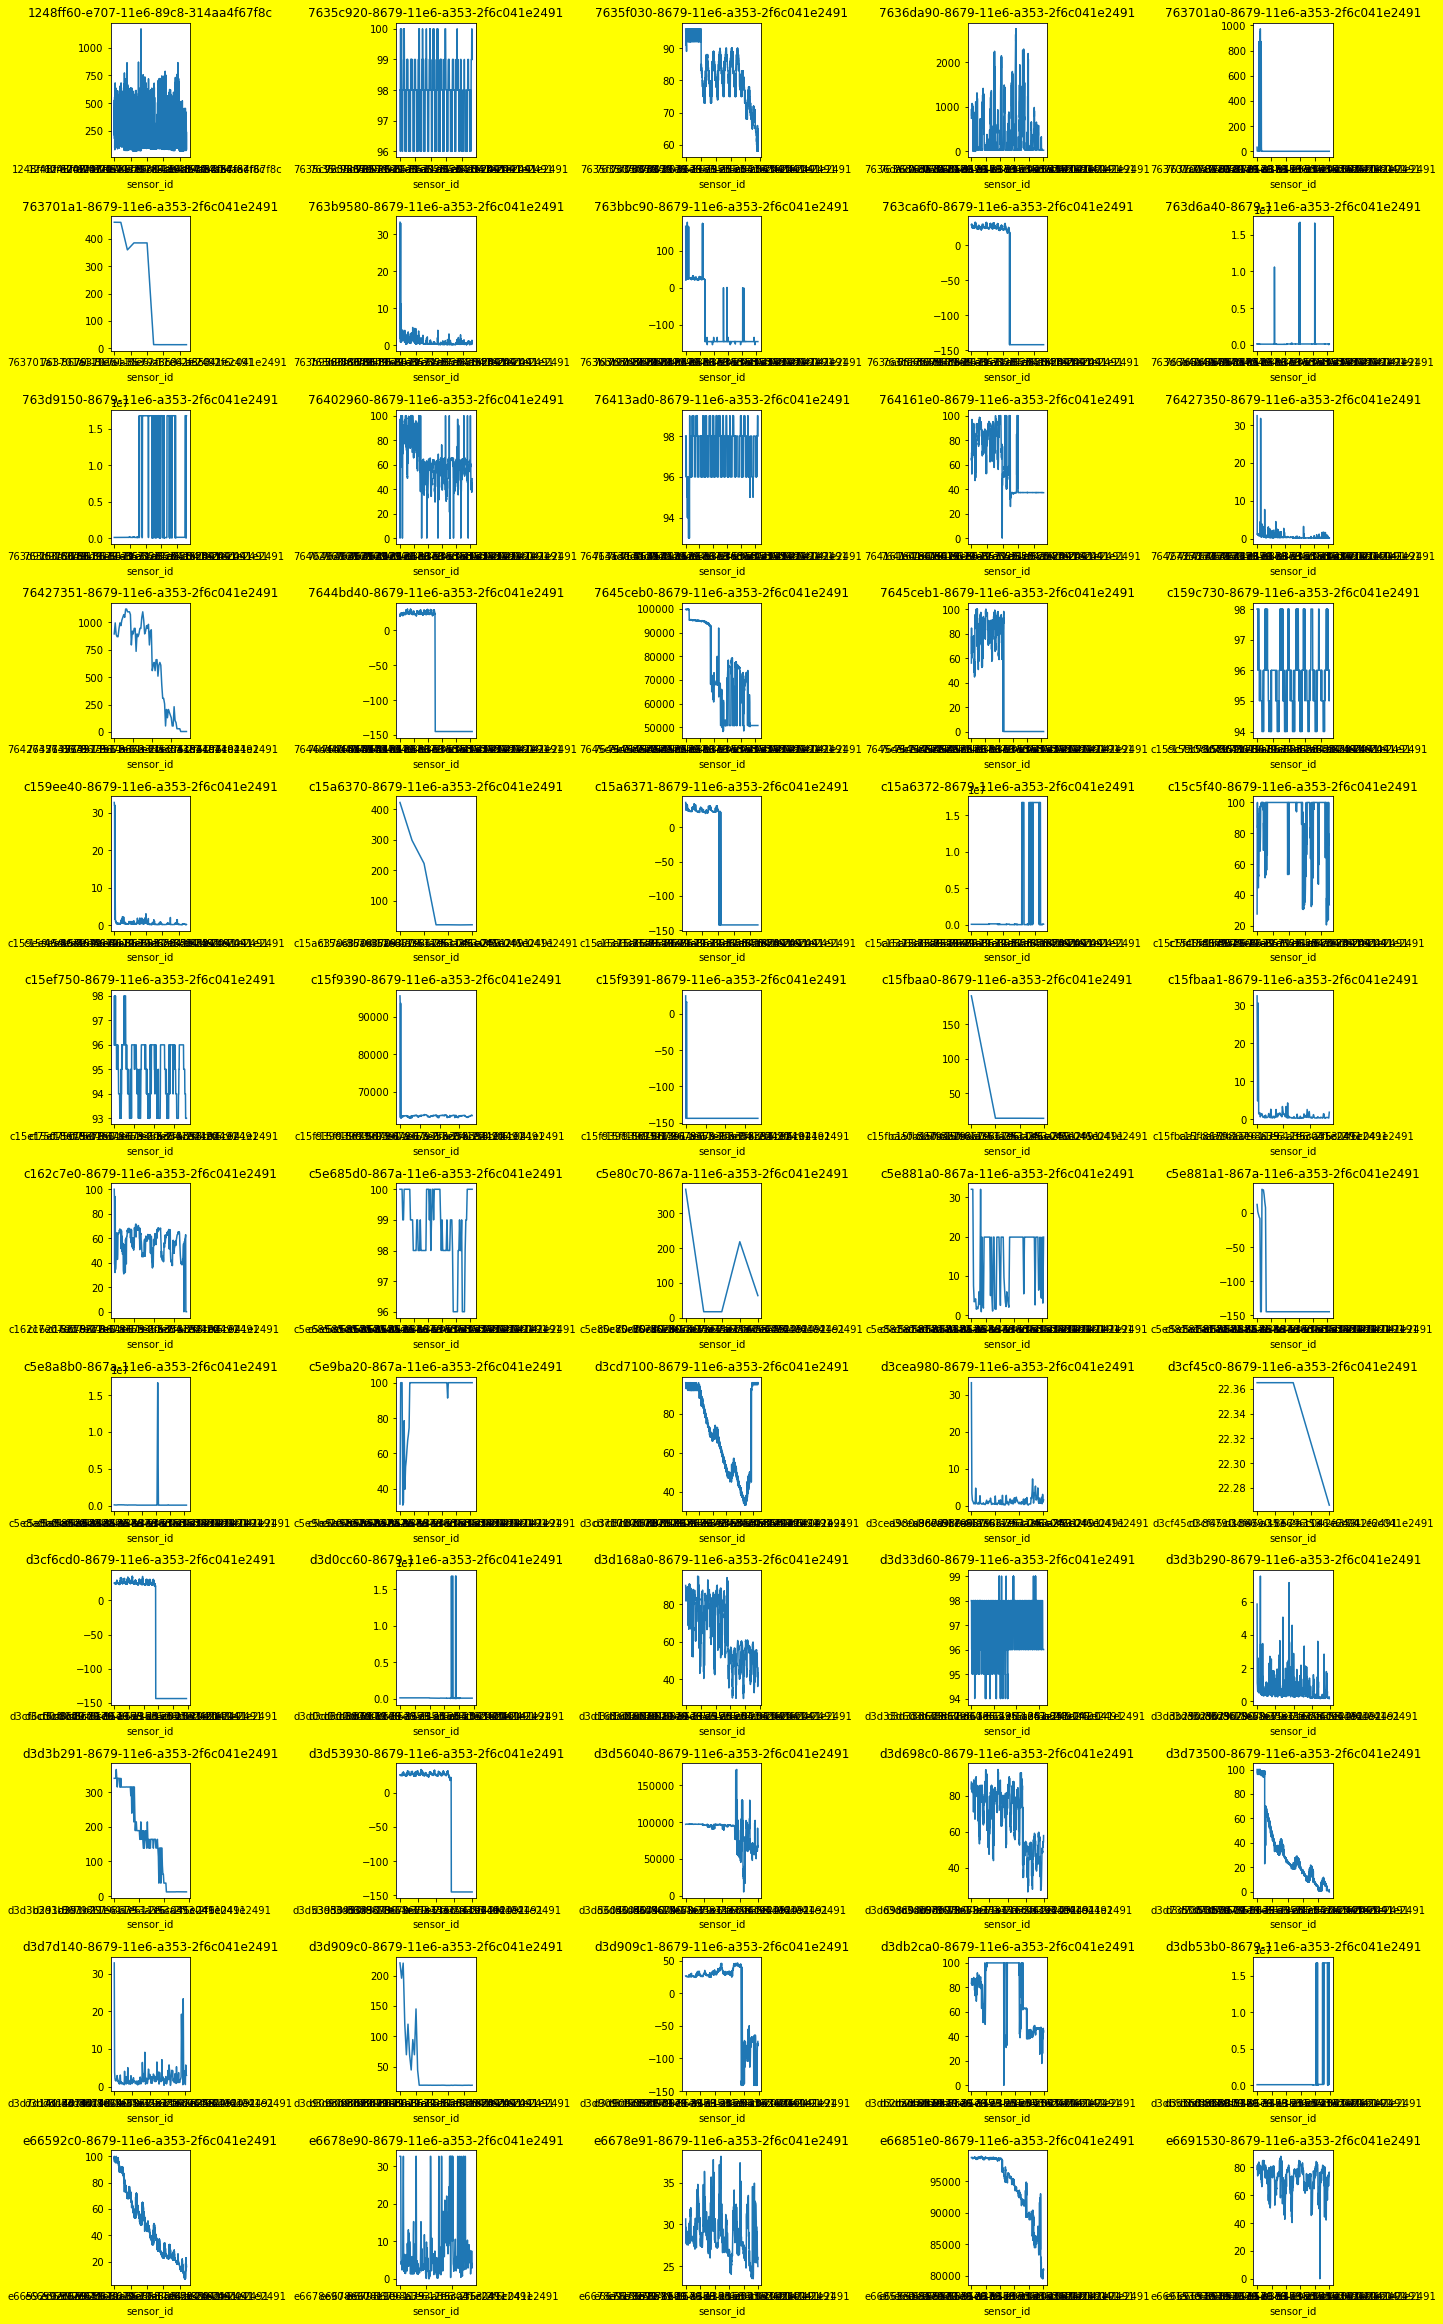

In [23]:
plt.figure(figsize=(20,40),facecolor='yellow')

plot_number = 1
for df1_sensor, selection in df1.groupby('sensor_id'):

    ax = plt.subplot(15,5,plot_number)
    selection.plot(x='sensor_id',y='value',ax=ax, label =df1_sensor,legend=False)
    ax.set_title(df1_sensor)
    plot_number = plot_number +1

plt.tight_layout()
#plt.savefig('lets.png',format(datapoints_sensor))

### 3.0 Descriptive Analysis One data frame at a time



You have two data frames: `sensors` and `types` Merge each sensor_id with its type. (Hint: Use `pd.merge()`)



In [24]:
# full = pd.merge(df1, df2, left_on='df1_field', right_on='df2_field')

In [29]:
#I will rename the column title 'id' for all the dataframes to avoid confusion and merging will be possible. 
df.rename(columns={'id': 'sensor_id'}, inplace=True)
df1.rename(columns={'id': 'datapoints_id'}, inplace=True)
df2.rename(columns={'id': 'datatypes_id'}, inplace=True)
df3.rename(columns={'id': 'nodes_id'}, inplace=True)
df4.rename(columns={'id': 'volcano_id'}, inplace=True)
#To confirm that the columns have been renamed I will print out one dataframe
df

C:\Users\212560139\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.797000+00:00,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.811000+00:00,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
...,...,...,...,...,...,...,...,...
56,e66851e0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 08:46:05+00:00,2016-09-29 20:13:52.902000+00:00,35dcb3c1-8679-11e6-bda3-ef77801087ee,e662fab0-8679-11e6-a353-2f6c041e2491
57,d3d73500-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00:00,2016-10-05 12:42:18.933000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491
58,d3d7d140-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00:00,2016-09-30 18:12:04.584000+00:00,35dcdad1-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491
59,d3d3b291-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:31:29+00:00,2016-09-30 18:12:04.585000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491


In [30]:
#Merging the sensors dataframe(df) and the types dataframe(df2)
full = pd.merge(df, df2, left_on='data_type_id', right_on='datatypes_id')
full

,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,datatypes_id,type,si_unit,type_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
1,7636da90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.577000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
2,76427351-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 22:09:40+00:00,2016-09-29 19:20:17.416000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
3,763701a1-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,c15fbaa0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.523000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
...,...,...,...,...,...,...,...,...,...,...,...,...
56,e6691530-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 08:46:05+00:00,2016-09-29 20:13:52.877000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,e662fab0-8679-11e6-a353-2f6c041e2491,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
57,d3d168a0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00:00,2016-09-30 18:12:04.582000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
58,d3d698c0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:31:29+00:00,2016-09-30 18:12:04.584000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
59,d3db2ca0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00:00,2016-09-30 18:12:04.584000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA


In [33]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   sensor_id       61 non-null     object             
 1   description     61 non-null     object             
 2   data_frequency  61 non-null     int64              
 3   status          61 non-null     object             
 4   created_at      61 non-null     datetime64[ns, UTC]
 5   updated_at      61 non-null     datetime64[ns, UTC]
 6   data_type_id    61 non-null     object             
 7   node_id         61 non-null     object             
 8   datatypes_id    61 non-null     object             
 9   type            61 non-null     object             
 10  si_unit         61 non-null     object             
 11  type_id         61 non-null     object             
dtypes: datetime64[ns, UTC](2), int64(1), object(9)
memory usage: 6.2+ KB


3.1 Question: What does this achieve? Why should we do this?

We want to see how many sensors of each time do we have a specific node. And this will tell us the different sensors that measure the different datas.

3.2: How many sensors of each type are there?

In [34]:
full.groupby('type_id').size()

type_id
BAT       10
GP_CO2    10
GP_H2S    10
HUMA      10
PA        10
RSAM       1
TCA       10
dtype: int64

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

Take the raw `datapoints` data frame and merge it with all the `sensors` and their types.

In [35]:
#Because the sensors dataframe has been merged with their types on the above exeercise and names the new dataframe as full,
#I will merge the datapoints with the full dataframe. 
full_1 = pd.merge(full, df1, on='sensor_id')
full_1

,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,datatypes_id,type,si_unit,type_id,datapoints_id,value,timestamp
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,c17df100-8679-11e6-a353-2f6c041e2491,422.650,2016-08-07 00:51:40+00:00
1,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,43ccb4c0-867a-11e6-a353-2f6c041e2491,298.581,2016-08-16 01:15:58+00:00
2,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,fe23ccf0-867a-11e6-a353-2f6c041e2491,222.549,2016-08-17 08:12:12+00:00
3,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,aa384560-867c-11e6-a353-2f6c041e2491,21.196,2016-08-19 08:38:31+00:00
4,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,97c89331-867c-11e6-a353-2f6c041e2491,21.295,2016-08-19 08:08:32+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63451,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,39e16940-e707-11e6-89c8-314aa4f67f8c,125.000,2016-08-31 19:00:01+00:00
63452,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,39e82000-e707-11e6-89c8-314aa4f67f8c,143.000,2016-08-31 19:50:00+00:00
63453,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,39f08470-e707-11e6-89c8-314aa4f67f8c,175.000,2016-08-31 21:00:02+00:00
63454,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,39f84ca0-e707-11e6-89c8-314aa4f67f8c,164.000,2016-08-31 21:50:00+00:00


In [36]:
#Looking at the columns for the merged data
full_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 63455
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   sensor_id       63456 non-null  object             
 1   description     63456 non-null  object             
 2   data_frequency  63456 non-null  int64              
 3   status          63456 non-null  object             
 4   created_at      63456 non-null  datetime64[ns, UTC]
 5   updated_at      63456 non-null  datetime64[ns, UTC]
 6   data_type_id    63456 non-null  object             
 7   node_id         63456 non-null  object             
 8   datatypes_id    63456 non-null  object             
 9   type            63456 non-null  object             
 10  si_unit         63456 non-null  object             
 11  type_id         63456 non-null  object             
 12  datapoints_id   63456 non-null  object             
 13  value           63456 non-null 

In [40]:
full_1['timestamp'] = pd.to_datetime(full_1['timestamp'])
full_1 = full_1.set_index('timestamp')

In [41]:
full_1

,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,datatypes_id,type,si_unit,type_id,datapoints_id,value
timestamp,,,,,,,,,,,,,,
2016-08-07 00:51:40+00:00,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,c17df100-8679-11e6-a353-2f6c041e2491,422.650
2016-08-16 01:15:58+00:00,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,43ccb4c0-867a-11e6-a353-2f6c041e2491,298.581
2016-08-17 08:12:12+00:00,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,fe23ccf0-867a-11e6-a353-2f6c041e2491,222.549
2016-08-19 08:38:31+00:00,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,aa384560-867c-11e6-a353-2f6c041e2491,21.196
2016-08-19 08:08:32+00:00,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2,97c89331-867c-11e6-a353-2f6c041e2491,21.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31 19:00:01+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,39e16940-e707-11e6-89c8-314aa4f67f8c,125.000
2016-08-31 19:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,39e82000-e707-11e6-89c8-314aa4f67f8c,143.000
2016-08-31 21:00:02+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,39f08470-e707-11e6-89c8-314aa4f67f8c,175.000


In [42]:
full_1.isnull().sum(axis=0)

sensor_id         0
description       0
data_frequency    0
status            0
created_at        0
updated_at        0
data_type_id      0
node_id           0
datatypes_id      0
type              0
si_unit           0
type_id           0
datapoints_id     0
value             0
dtype: int64

-----

### 5.0 Time Series based analysis

Now, we are going to take this stitched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

     Note: If by this point the time stamp is not in datetime format, make sure it is in datetime format.
    Step 1: Resample the dataset to the daily level. (One observation per date)
    Step 2: For the resampled data, calculate the daily mean, min and max values for each sensor id.

Resample to get daily averages.
Then subset to select the columns you need.

Present the data in a summary similar to the example presented below:


![title](example-1.png)

In [43]:
DRA = full_1.value.resample('D').mean()
DRA

timestamp
2016-07-01 00:00:00+00:00    306.902098
2016-07-02 00:00:00+00:00    267.804196
2016-07-03 00:00:00+00:00    286.972028
2016-07-04 00:00:00+00:00    339.860140
2016-07-05 00:00:00+00:00    445.828571
                                ...    
2016-10-02 00:00:00+00:00     84.783231
2016-10-03 00:00:00+00:00     79.059548
2016-10-04 00:00:00+00:00     77.155172
2016-10-05 00:00:00+00:00     73.356674
2016-10-06 00:00:00+00:00     68.235294
Freq: D, Name: value, Length: 98, dtype: float64

In [44]:
print (full_1.resample('D')['value'].agg(['min', 'max']))

                             min    max
timestamp                              
2016-07-01 00:00:00+00:00   81.0  683.0
2016-07-02 00:00:00+00:00  113.0  558.0
2016-07-03 00:00:00+00:00  109.0  513.0
2016-07-04 00:00:00+00:00   89.0  637.0
2016-07-05 00:00:00+00:00  124.0  612.0
...                          ...    ...
2016-10-02 00:00:00+00:00    1.0   99.0
2016-10-03 00:00:00+00:00    1.0   98.0
2016-10-04 00:00:00+00:00    1.0   98.0
2016-10-05 00:00:00+00:00    0.0   98.0
2016-10-06 00:00:00+00:00   58.0   96.0

[98 rows x 2 columns]


### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/example-2.png" width=450 height=200>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their type id's

In [45]:
criteria = full_1.type_id == 'TCA'
criteria

timestamp
2016-08-07 00:51:40+00:00    False
2016-08-16 01:15:58+00:00    False
2016-08-17 08:12:12+00:00    False
2016-08-19 08:38:31+00:00    False
2016-08-19 08:08:32+00:00    False
                             ...  
2016-08-31 19:00:01+00:00    False
2016-08-31 19:50:00+00:00    False
2016-08-31 21:00:02+00:00    False
2016-08-31 21:50:00+00:00    False
2016-08-31 23:00:00+00:00    False
Name: type_id, Length: 63456, dtype: bool

In [46]:
s2 = full_1
temp_sensors = [s for s in s2[s2.type_id =='TCA']['sensor_id']]
temp_sensors

['763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Group by sensor_ids and hence plot each group per time.

In [47]:
full_1.groupby(['sensor_id']).size()

sensor_id
1248ff60-e707-11e6-89c8-314aa4f67f8c    8816
7635c920-8679-11e6-a353-2f6c041e2491     935
7635f030-8679-11e6-a353-2f6c041e2491    4831
7636da90-8679-11e6-a353-2f6c041e2491    1009
763701a0-8679-11e6-a353-2f6c041e2491    1007
763701a1-8679-11e6-a353-2f6c041e2491      12
763b9580-8679-11e6-a353-2f6c041e2491     914
763bbc90-8679-11e6-a353-2f6c041e2491    1025
763ca6f0-8679-11e6-a353-2f6c041e2491     926
763d6a40-8679-11e6-a353-2f6c041e2491    1028
763d9150-8679-11e6-a353-2f6c041e2491     919
76402960-8679-11e6-a353-2f6c041e2491    1031
76413ad0-8679-11e6-a353-2f6c041e2491    1047
764161e0-8679-11e6-a353-2f6c041e2491     925
76427350-8679-11e6-a353-2f6c041e2491    1019
76427351-8679-11e6-a353-2f6c041e2491      77
7644bd40-8679-11e6-a353-2f6c041e2491    1026
7645ceb0-8679-11e6-a353-2f6c041e2491    1038
7645ceb1-8679-11e6-a353-2f6c041e2491    1032
c159c730-8679-11e6-a353-2f6c041e2491     450
c159ee40-8679-11e6-a353-2f6c041e2491     450
c15a6370-8679-11e6-a353-2f6c041e2491       7


In [60]:
from matplotlib import pyplot

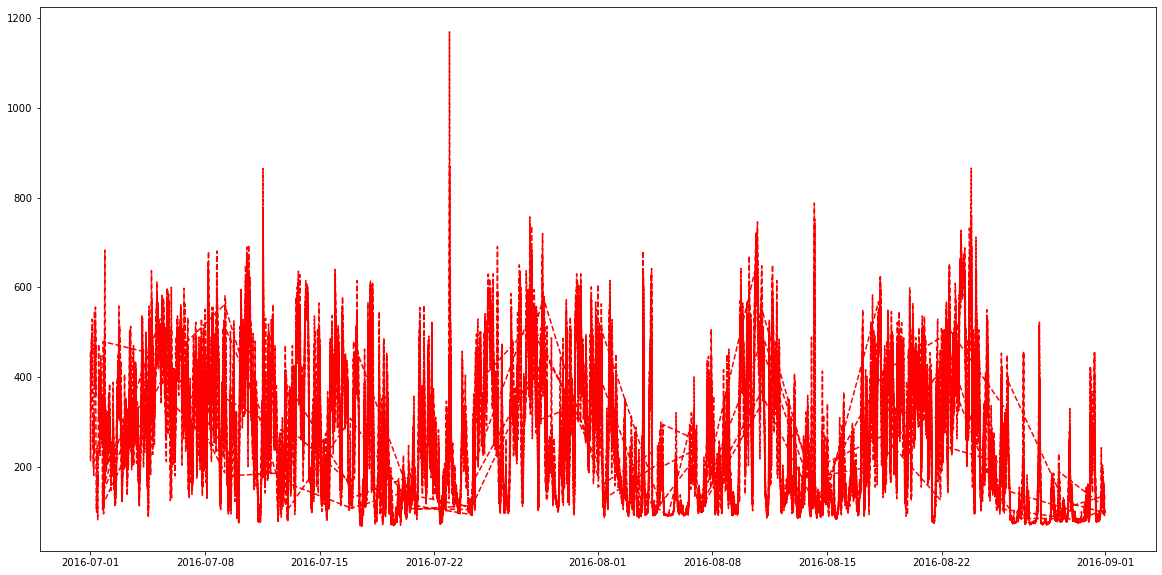

In [61]:
temp_sensors=full_1.loc[full_1['sensor_id'] =="1248ff60-e707-11e6-89c8-314aa4f67f8c"]
pyplot.figure(figsize=(20,10))              
pyplot.plot(temp_sensors['value'],'r--')

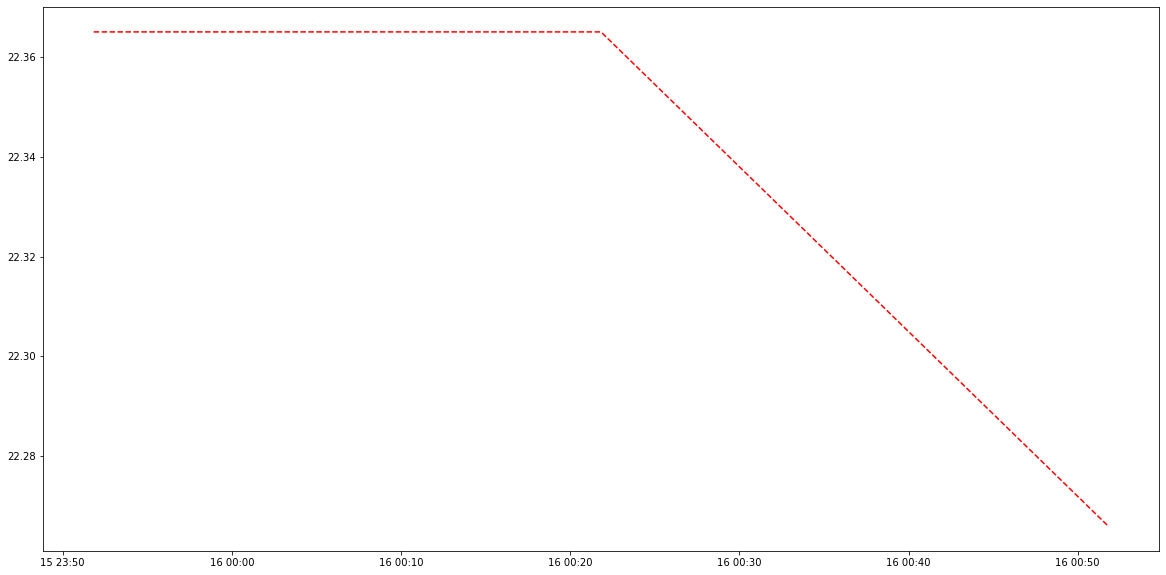

In [62]:
temp_sensors1=full_1.loc[full_1['sensor_id'] =="d3cf45c0-8679-11e6-a353-2f6c041e2491"]
pyplot.figure(figsize=(20,10))              
pyplot.plot(temp_sensors1['value'],'r--')

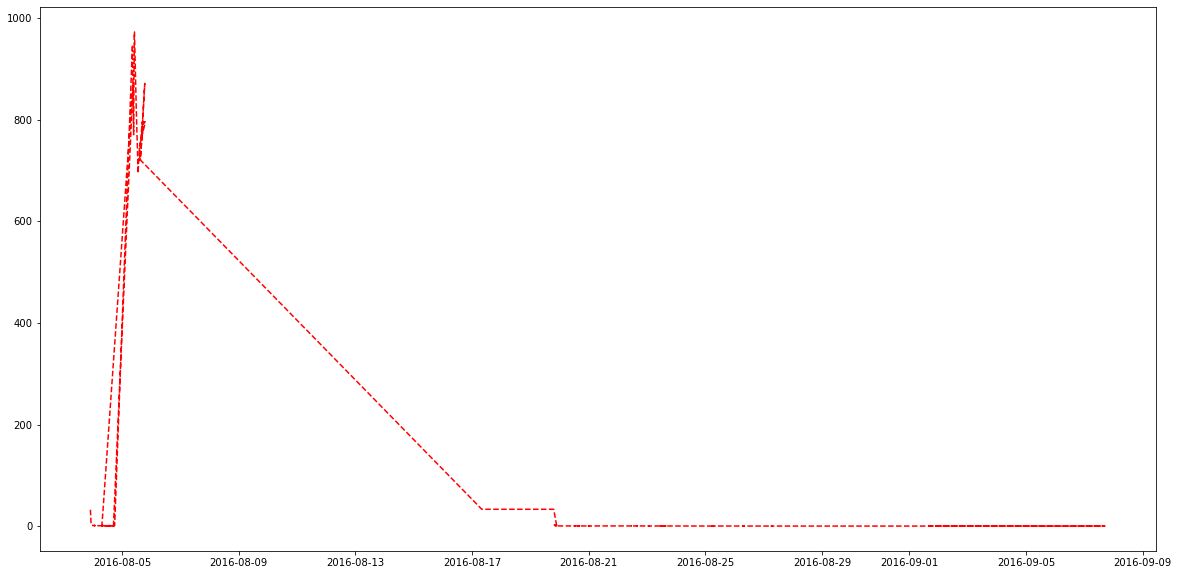

In [63]:
temp_sensors2=full_1.loc[full_1['sensor_id'] =="763701a0-8679-11e6-a353-2f6c041e2491"]
pyplot.figure(figsize=(20,10))              
pyplot.plot(temp_sensors2['value'],'r--')

In [50]:
#plt.figure(figsize=(20,5))

#for s in temp_sensors:
    #print(s)
    #sub_df = full_1[full_1['sensor_id']==s]
    #plt.plot(sub_df.index, sub_df['value'], '.')

**Task: Creating Subplots - Each temperature sensor gets its own panel**

In [51]:
#fig, axarr = plt.subplots(10, sharex=True)
#fig.set_size_inches(20,30) 

#plt.figure(figsize=(20,20))
#for i,s in enumerate(temp_sensors):
    #sub_df = full_1[full_1['sensor_id']==s]
    #axarr[i].plot(sub_df.index, sub_df['value'], '.')

Question: Based on the plots being made, comment on the readings made by the temperature sensors.

The temperature sensors took data from 2016-08-06 up until 2016-09-09

**Task: Clean Up Sensor Data**

## Task: Creating a reshaped Data Frame of Temperature sensors

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [88]:
#df1.pivot(index='patient', columns='obs', values='score')

In [90]:
#temp_df = full_1[full_1['sensor_id'].isin(temp_sensors)]
#del temp_df['timestamp']
#temp_df = temp_df.reset_index()
#temp_df.pivot(columns='sensor_id', values='value')


Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [64]:
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
pd.concat(g for _, g in full_1.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,datatypes_id,type,si_unit,type_id,datapoints_id,value
timestamp,,,,,,,,,,,,,,
2016-08-20 10:21:36+00:00,d3d698c0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:31:29+00:00,2016-09-30 18:12:04.584000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA,8a76e320-867d-11e6-a353-2f6c041e2491,67.00
2016-08-20 10:21:36+00:00,d3d698c0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:31:29+00:00,2016-09-30 18:12:04.584000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA,8a75d1b0-867d-11e6-a353-2f6c041e2491,67.00
2016-08-20 19:09:27+00:00,d3db53b0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00:00,2016-09-30 18:12:04.584000+00:00,35dcb3c1-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA,fa865380-867d-11e6-a353-2f6c041e2491,97011.38
2016-08-20 19:09:27+00:00,d3db53b0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00:00,2016-09-30 18:12:04.584000+00:00,35dcb3c1-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA,fa856920-867d-11e6-a353-2f6c041e2491,97011.38
2016-08-20 19:22:50+00:00,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.811000+00:00,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA,fa945d40-867d-11e6-a353-2f6c041e2491,95352.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 11:58:53+00:00,d3cd7100-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00:00,2016-10-07 07:43:04.976000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT,bee9e830-8b25-11e6-ad43-49bd404a7931,96.00
2016-10-05 12:49:40+00:00,7635f030-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-10-07 07:43:04.976000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT,de98b330-8b2c-11e6-ad43-49bd404a7931,71.00
2016-10-05 12:49:40+00:00,7635f030-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-10-07 07:43:04.976000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT,de986510-8b2c-11e6-ad43-49bd404a7931,71.00


**Task: Drop Duplicates**
1. Drop all the rows where timestamp and sensor_id are duplicated
2. Pivot the table
3. Resample the temperature data to daily level.
4. Calculate the mean of the resampled daily data.

In [65]:
full_2 = pd.merge(full, df1, on='sensor_id')

In [66]:
full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 63455
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   sensor_id       63456 non-null  object             
 1   description     63456 non-null  object             
 2   data_frequency  63456 non-null  int64              
 3   status          63456 non-null  object             
 4   created_at      63456 non-null  datetime64[ns, UTC]
 5   updated_at      63456 non-null  datetime64[ns, UTC]
 6   data_type_id    63456 non-null  object             
 7   node_id         63456 non-null  object             
 8   datatypes_id    63456 non-null  object             
 9   type            63456 non-null  object             
 10  si_unit         63456 non-null  object             
 11  type_id         63456 non-null  object             
 12  datapoints_id   63456 non-null  object             
 13  value           63456 non-null 

In [67]:
tdf = full_2.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [68]:
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')
temp_df_cor

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d7d140-8679-11e6-a353-2f6c041e2491,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01 00:00:31+00:00,455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02+00:00,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00+00:00,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01+00:00,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00+00:00,429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-06 07:08:04+00:00,NaN,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-06 07:12:12+00:00,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-06 07:20:18+00:00,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
daily_temp_cor_df = temp_df_cor.resample('D').mean()
daily_temp_cor_df

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d7d140-8679-11e6-a353-2f6c041e2491,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01 00:00:00+00:00,306.902098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02 00:00:00+00:00,267.804196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03 00:00:00+00:00,286.972028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04 00:00:00+00:00,339.860140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05 00:00:00+00:00,445.828571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,NaN,NaN,83.110236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-03 00:00:00+00:00,NaN,NaN,78.088710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-04 00:00:00+00:00,NaN,NaN,72.263014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [70]:
corr_df = daily_temp_cor_df.corr()
corr_df

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d7d140-8679-11e6-a353-2f6c041e2491,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
sensor_id,,,,,,,,,,,,,,,,,,,,,
1248ff60-e707-11e6-89c8-314aa4f67f8c,1.000000,0.056741,0.256420,-0.145159,-0.231213,-1.0,0.162387,0.559663,0.394010,-0.132435,...,0.314193,-1.0,0.026042,-0.019962,-0.324951,0.624806,0.550366,0.399067,0.209657,-0.484948
7635c920-8679-11e6-a353-2f6c041e2491,0.056741,1.000000,0.919860,0.437023,0.805595,-1.0,0.709081,0.284575,0.169985,-0.022837,...,-0.349062,NaN,0.319896,0.336403,-0.157052,0.428216,-0.423572,0.529397,0.496862,-0.210743
7635f030-8679-11e6-a353-2f6c041e2491,0.256420,0.919860,1.000000,0.311397,-0.810898,-1.0,0.859498,-0.146561,0.407107,0.063834,...,-0.344789,NaN,0.345592,0.361554,-0.140913,0.448233,-0.416392,0.588727,0.525331,-0.286822
7636da90-8679-11e6-a353-2f6c041e2491,-0.145159,0.437023,0.311397,1.000000,-0.282349,1.0,0.621938,0.216933,0.082379,-0.001744,...,-0.128374,NaN,0.186681,0.202719,-0.019320,0.134939,-0.336431,0.183124,0.361271,0.235226
763701a0-8679-11e6-a353-2f6c041e2491,-0.231213,0.805595,-0.810898,-0.282349,1.000000,1.0,0.996932,0.263343,0.257477,-0.079009,...,-0.386761,NaN,0.287796,0.272720,-0.188579,0.279143,-0.280631,0.372649,0.465574,0.006906
763701a1-8679-11e6-a353-2f6c041e2491,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763b9580-8679-11e6-a353-2f6c041e2491,0.162387,0.709081,0.859498,0.621938,0.996932,1.0,1.000000,0.471356,0.273618,-0.127574,...,-0.378796,NaN,0.306344,0.284863,-0.211113,0.324922,-0.266545,0.397820,0.493697,-0.005684
763bbc90-8679-11e6-a353-2f6c041e2491,0.559663,0.284575,-0.146561,0.216933,0.263343,1.0,0.471356,1.000000,0.604068,-0.170914,...,0.046589,NaN,0.872380,0.764598,-0.820555,0.711202,0.109391,0.652321,0.900741,-0.092388
763ca6f0-8679-11e6-a353-2f6c041e2491,0.394010,0.169985,0.407107,0.082379,0.257477,1.0,0.273618,0.604068,1.000000,-0.358535,...,0.725152,NaN,-0.289171,-0.329598,0.314745,0.930503,-0.005210,0.066722,-0.341909,-0.523167


In [71]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its top-left to bottom-right 
# diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

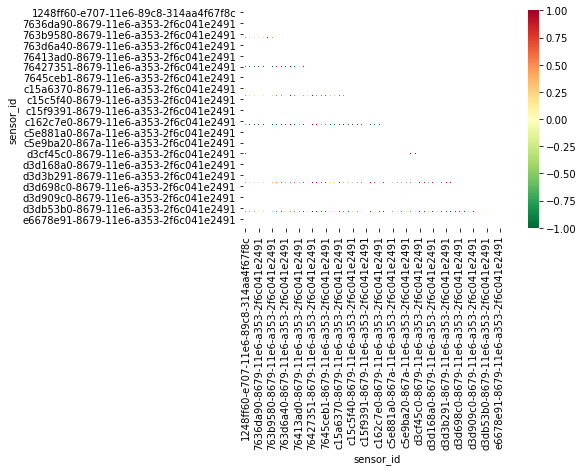

In [72]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [73]:
full2 = full_2.reset_index().drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [74]:
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')

In [75]:
daily_all_sensors = full_wide.resample('D').mean()
daily_all_sensors

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d7d140-8679-11e6-a353-2f6c041e2491,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01 00:00:00+00:00,306.902098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02 00:00:00+00:00,267.804196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03 00:00:00+00:00,286.972028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04 00:00:00+00:00,339.860140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05 00:00:00+00:00,445.828571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,NaN,NaN,83.110236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-03 00:00:00+00:00,NaN,NaN,78.088710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-04 00:00:00+00:00,NaN,NaN,72.263014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question:**
Based on the results of the correlation heatmap for temperature sensors, would you recommend working with all temperature sensors or just a subset?

**Task: Based on the answer above, remove unnecessary temperature sensors from the data**

## Trying to building a Linear Model

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [76]:
nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

**Task: Merge the full data set with the nodes**

1. Perform the merge above.
2. Resample the data to the daily level and show a sample of the mean.
3. Pivot the table to show columns of the sensor types as columns vs name and timestamp


<img src = "images/example-3.png" width=450 height=400>

In [78]:
#Merging the full set with the nodes
full_2.rename(columns={'node_id': 'nodes_id'}, inplace=True)
full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 63455
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   sensor_id       63456 non-null  object             
 1   description     63456 non-null  object             
 2   data_frequency  63456 non-null  int64              
 3   status          63456 non-null  object             
 4   created_at      63456 non-null  datetime64[ns, UTC]
 5   updated_at      63456 non-null  datetime64[ns, UTC]
 6   data_type_id    63456 non-null  object             
 7   nodes_id        63456 non-null  object             
 8   datatypes_id    63456 non-null  object             
 9   type            63456 non-null  object             
 10  si_unit         63456 non-null  object             
 11  type_id         63456 non-null  object             
 12  datapoints_id   63456 non-null  object             
 13  value           63456 non-null 

In [79]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   nodes_id     11 non-null     object             
 1   name         11 non-null     object             
 2   description  11 non-null     object             
 3   location     11 non-null     object             
 4   status       11 non-null     object             
 5   created_at   11 non-null     datetime64[ns, UTC]
 6   updated_at   11 non-null     datetime64[ns, UTC]
 7   volcano_id   11 non-null     object             
dtypes: datetime64[ns, UTC](2), object(6)
memory usage: 832.0+ bytes


In [80]:
#Merging the full set with the nodes
fullnode = pd.merge(full_2, df3, on='nodes_id')
fullnode

,sensor_id,description_x,data_frequency,status_x,created_at_x,updated_at_x,data_type_id,nodes_id,datatypes_id,type,...,datapoints_id,value,timestamp,name,description_y,location,status_y,created_at_y,updated_at_y,volcano_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,...,c17df100-8679-11e6-a353-2f6c041e2491,422.650,2016-08-07 00:51:40+00:00,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.065000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,...,43ccb4c0-867a-11e6-a353-2f6c041e2491,298.581,2016-08-16 01:15:58+00:00,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.065000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,...,fe23ccf0-867a-11e6-a353-2f6c041e2491,222.549,2016-08-17 08:12:12+00:00,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.065000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
3,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,...,aa384560-867c-11e6-a353-2f6c041e2491,21.196,2016-08-19 08:38:31+00:00,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.065000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
4,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,...,97c89331-867c-11e6-a353-2f6c041e2491,21.295,2016-08-19 08:08:32+00:00,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.065000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63451,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,...,39e16940-e707-11e6-89c8-314aa4f67f8c,125.000,2016-08-31 19:00:01+00:00,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
63452,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,...,39e82000-e707-11e6-89c8-314aa4f67f8c,143.000,2016-08-31 19:50:00+00:00,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
63453,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,...,39f08470-e707-11e6-89c8-314aa4f67f8c,175.000,2016-08-31 21:00:02+00:00,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
63454,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed

In [81]:
fullnode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 63455
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   sensor_id       63456 non-null  object             
 1   description_x   63456 non-null  object             
 2   data_frequency  63456 non-null  int64              
 3   status_x        63456 non-null  object             
 4   created_at_x    63456 non-null  datetime64[ns, UTC]
 5   updated_at_x    63456 non-null  datetime64[ns, UTC]
 6   data_type_id    63456 non-null  object             
 7   nodes_id        63456 non-null  object             
 8   datatypes_id    63456 non-null  object             
 9   type            63456 non-null  object             
 10  si_unit         63456 non-null  object             
 11  type_id         63456 non-null  object             
 12  datapoints_id   63456 non-null  object             
 13  value           63456 non-null 

In [85]:
tdf2 = fullnode.drop_duplicates(subset = ['timestamp', 'nodes_id'], keep='first')

In [86]:
temp_df_cor2 = tdf2.pivot(index='timestamp', columns='nodes_id', values='value')
temp_df_cor2

nodes_id,762b8ff0-8679-11e6-a353-2f6c041e2491,762c5340-8679-11e6-a353-2f6c041e2491,76309900-8679-11e6-a353-2f6c041e2491,c147ece0-8679-11e6-a353-2f6c041e2491,c14ccee0-8679-11e6-a353-2f6c041e2491,c5e39fa0-867a-11e6-a353-2f6c041e2491,d3ca3cb0-8679-11e6-a353-2f6c041e2491,d3cb7530-8679-11e6-a353-2f6c041e2491,d3cbc350-8679-11e6-a353-2f6c041e2491,e662fab0-8679-11e6-a353-2f6c041e2491,ede3ed60-e701-11e6-83c1-01ce06e6d17f
timestamp,,,,,,,,,,,
2016-07-01 00:00:31+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0
2016-07-01 00:10:02+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
2016-07-01 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0
2016-07-01 00:30:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321.0
2016-07-01 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-06 07:08:04+00:00,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-06 07:12:12+00:00,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-06 07:20:18+00:00,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
temp_df_cor2.resample('D').mean()

nodes_id,762b8ff0-8679-11e6-a353-2f6c041e2491,762c5340-8679-11e6-a353-2f6c041e2491,76309900-8679-11e6-a353-2f6c041e2491,c147ece0-8679-11e6-a353-2f6c041e2491,c14ccee0-8679-11e6-a353-2f6c041e2491,c5e39fa0-867a-11e6-a353-2f6c041e2491,d3ca3cb0-8679-11e6-a353-2f6c041e2491,d3cb7530-8679-11e6-a353-2f6c041e2491,d3cbc350-8679-11e6-a353-2f6c041e2491,e662fab0-8679-11e6-a353-2f6c041e2491,ede3ed60-e701-11e6-83c1-01ce06e6d17f
timestamp,,,,,,,,,,,
2016-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.902098
2016-07-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.804196
2016-07-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.972028
2016-07-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339.860140
2016-07-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,445.828571
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,NaN,83.110236,NaN,NaN,NaN,NaN,95.632653,97.200000,1.000000,NaN,NaN
2016-10-03 00:00:00+00:00,NaN,78.088710,NaN,NaN,NaN,NaN,95.693878,97.125000,1.235294,NaN,NaN
2016-10-04 00:00:00+00:00,NaN,72.263014,NaN,NaN,NaN,NaN,95.734694,97.166667,1.000000,NaN,NaN


In [91]:
table = pd.pivot_table(data=fullnode,index=['timestamp'])
table

,data_frequency,value
timestamp,,
2016-07-01 00:00:31+00:00,1800000,455.0
2016-07-01 00:10:02+00:00,1800000,213.0
2016-07-01 00:20:00+00:00,1800000,225.0
2016-07-01 00:30:01+00:00,1800000,321.0
2016-07-01 00:40:00+00:00,1800000,429.0
...,...,...
2016-10-06 07:08:04+00:00,1800000,64.0
2016-10-06 07:12:12+00:00,1800000,65.0
2016-10-06 07:20:18+00:00,1800000,66.0


In [93]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')

In [94]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [95]:
fn_wide.head()

type,name,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,,
2016-07-01 00:00:31+00:00,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02+00:00,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00+00:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01+00:00,RSAM,321.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00+00:00,RSAM,429.0,NaN,NaN,NaN,NaN,NaN,NaN


Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [96]:
lmfn = fn_wide.resample('D').mean()

In [97]:
lmfn.shape

(98, 7)

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [98]:
# Supervised learning linear regression

from sklearn import linear_model

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [99]:
train.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [100]:
target, predictors = 'battery', 'temperature'

x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train[target].to_frame()
x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test[target].to_frame()